In [5]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read in processed data from github
df = pd.read_csv("https://raw.githubusercontent.com/rukky022/AI_HR_Attrition/main/attrition_processed_encoded.csv", index_col="EmployeeID")
df

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.785714,No,0.178571,2,1,0.777360,0.125,0.000000,0,0.035714,...,0,0,0,0,0,0,0,0,1,0
2,0.309524,Yes,0.321429,1,1,0.204180,0.000,0.857143,1,0.214286,...,0,0,0,0,1,0,0,0,0,1
3,0.333333,No,0.571429,4,4,1.000000,0.125,0.285714,3,0.178571,...,0,0,0,0,0,1,0,0,1,0
4,0.476190,No,0.035714,5,3,0.469485,0.375,0.000000,3,0.464286,...,0,0,0,0,0,0,0,0,1,0
5,0.333333,No,0.321429,1,1,0.085589,0.500,0.071429,2,0.321429,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,0.571429,No,0.142857,4,1,0.322322,0.375,0.428571,1,0.357143,...,0,0,0,0,1,0,0,0,0,1
4407,0.261905,No,0.035714,4,1,0.107227,0.250,0.285714,0,0.357143,...,1,0,0,0,0,0,0,1,0,0
4408,0.166667,No,0.857143,2,2,0.172911,0.000,0.642857,0,0.178571,...,0,0,0,0,0,1,0,0,1,0


In [7]:
# make a dataframe with all columns except the target column
df_desc_features = df.drop(['Attrition'], axis=1)
df_desc_features.head(5)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.785714,0.178571,2,1,0.777360,0.125,0.000000,0,0.035714,1.00,...,0,0,0,0,0,0,0,0,1,0
2,0.309524,0.321429,1,1,0.204180,0.000,0.857143,1,0.214286,0.75,...,0,0,0,0,1,0,0,0,0,1
3,0.333333,0.571429,4,4,1.000000,0.125,0.285714,3,0.178571,0.50,...,0,0,0,0,0,1,0,0,1,0
4,0.476190,0.035714,5,3,0.469485,0.375,0.000000,3,0.464286,1.00,...,0,0,0,0,0,0,0,0,1,0
5,0.333333,0.321429,1,1,0.085589,0.500,0.071429,2,0.321429,0.50,...,0,0,0,0,0,1,0,0,0,1


__________________________________________________
## Feature Extraction
-Bokyung

In [8]:
from sklearn.model_selection import train_test_split
X, y = df_desc_features, df['Attrition']

# split data into training and testing sets
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.25)

# split training into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_main, y_main, test_size = 0.33)

In [9]:
# We need to preprocess the data to handle missing values before passing it to the function. 
# Imputes the missing values in X_train, X_validate, and X_test with the mean of each column. 

from sklearn.impute import SimpleImputer 

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_train_imputed = imputer.fit_transform(X_train)
X_validate_imputed = imputer.transform(X_validate)
X_test_imputed = imputer.transform(X_test)

# Convert the numpy arrays back to DataFrames
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_validate = pd.DataFrame(X_validate_imputed, columns=X_validate.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# feature selection using recursive feature elimination with a Decision Tree as estimator
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

# fit rfe with validation set
rfe = rfe.fit(X_validate, y_validate)

In [11]:
# print rankings and whether selected or not
for i, col in zip(range(X.shape[1]), X.columns):
    boolean = 'True' if rfe.support_[i] else 'False'
    print("{0:17} | selected = {1:5} | rank = {2:2}".format(col, boolean, rfe.ranking_[i]))

Age               | selected = True  | rank =  1
DistanceFromHome  | selected = True  | rank =  1
Education         | selected = True  | rank =  1
JobLevel          | selected = False | rank =  4
MonthlyIncome     | selected = True  | rank =  1
NumCompaniesWorked | selected = True  | rank =  1
PercentSalaryHike | selected = False | rank =  2
StockOptionLevel  | selected = False | rank = 20
TotalWorkingYears | selected = True  | rank =  1
TrainingTimesLastYear | selected = False | rank =  5
YearsAtCompany    | selected = True  | rank =  1
YearsSinceLastPromotion | selected = False | rank =  7
YearsWithCurrManager | selected = False | rank =  3
EnvironmentSatisfaction | selected = True  | rank =  1
JobSatisfaction   | selected = True  | rank =  1
WorkLifeBalance   | selected = False | rank =  6
JobInvolvement    | selected = False | rank =  8
PerformanceRating | selected = False | rank = 27
BusinessTravel_Non-Travel | selected = False | rank = 34
BusinessTravel_Travel_Frequently | select

In [12]:
# determine 10 relevant features
selected_features = [col for i, col in enumerate(X.columns) if rfe.support_[i]]
print("Selected features:", selected_features)

features = selected_features

# create new dataframe with just those features
target_feature = "Attrition"
final_df = df[features + [target_feature]]

Selected features: ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus_Single']


In [13]:
# model ready dataset
final_df

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Single,Attrition
EmployeeID,,,,,,,,,,,
1,0.785714,0.178571,2,0.777360,0.125,0.035714,0.055556,3.0,4.0,0,No
2,0.309524,0.321429,1,0.204180,0.000,0.214286,0.277778,3.0,2.0,1,Yes
3,0.333333,0.571429,4,1.000000,0.125,0.178571,0.277778,2.0,2.0,0,No
4,0.476190,0.035714,5,0.469485,0.375,0.464286,0.444444,4.0,4.0,0,No
5,0.333333,0.321429,1,0.085589,0.500,0.321429,0.333333,4.0,1.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...
4406,0.571429,0.142857,4,0.322322,0.375,0.357143,0.166667,4.0,1.0,1,No
4407,0.261905,0.035714,4,0.107227,0.250,0.357143,0.166667,4.0,4.0,0,No
4408,0.166667,0.857143,2,0.172911,0.000,0.178571,0.222222,1.0,3.0,0,No


____________________________
# Model Implementation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# drop the rows that contain missing values (remove NaN values)
final_df = final_df.dropna()

# create a training set and testing set by spliting the original dataset
train_x, test_x, train_y, test_y = train_test_split(final_df[features], final_df[target_feature], test_size=1/4, random_state=2)

____________________________________________
## Decision Trees
-Lorena

In [15]:
from sklearn.tree import DecisionTreeClassifier

# create a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=2, max_depth=4)

# train the model 
dt_classifier.fit(train_x, train_y)

# predict the results
dt_result = dt_classifier.predict(test_x)

In [16]:
# calculate the accuracy of the decision tree
dt_original_accuracy = accuracy_score(test_y, dt_result)
print("Decision Tree Accuracy: {:.2f}%".format(dt_original_accuracy * 100))

# visualize confusion matrix 
conf_m_DT = confusion_matrix(test_y, dt_result)
conf_m_DT = pd.DataFrame(conf_m_DT)

print("\nConfusion Matrix")
conf_m_DT

Decision Tree Accuracy: 85.90%

Confusion Matrix


,0,1
0,888,25
1,128,44


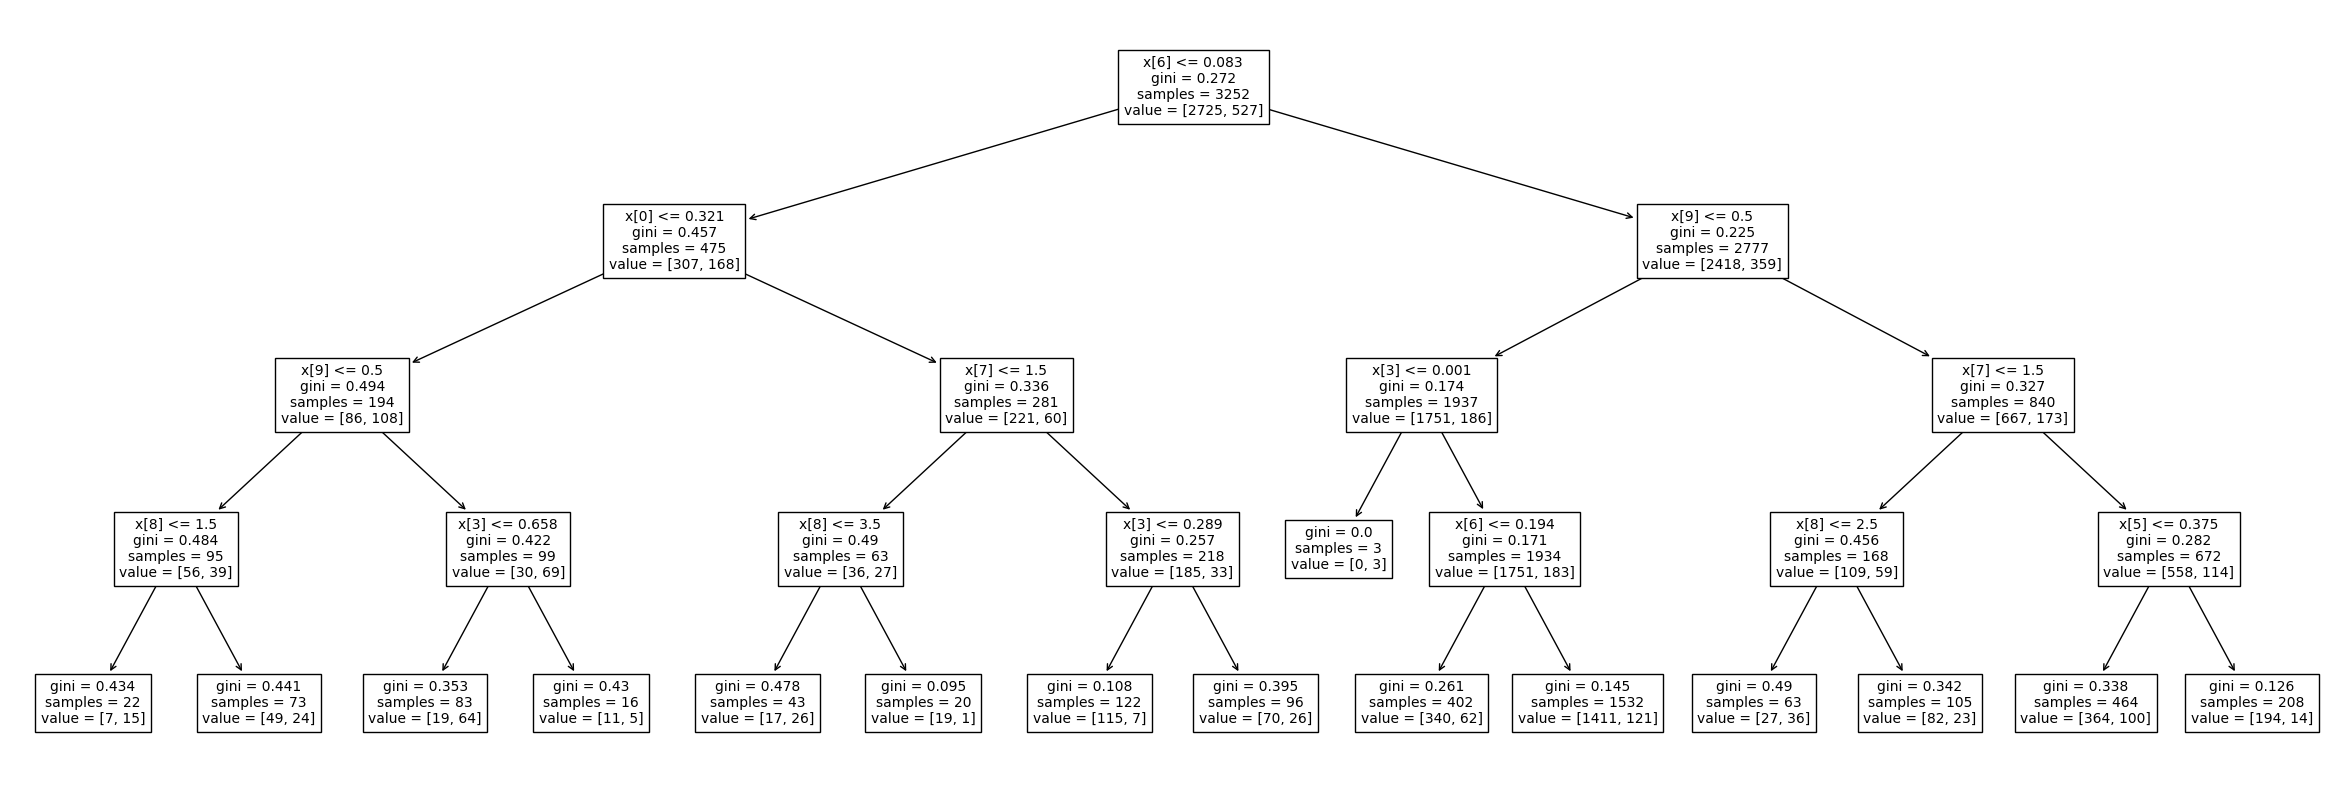

In [17]:
# visualize the decision tree
from sklearn import tree

plt.figure(figsize=(30,10))
graph_tree = tree.plot_tree(dt_classifier, fontsize=10)

### Hyper-Parameter Optimization with Grid Search
-Ruqayyah

In [18]:
# defining parameters for decision tree classifier 
parameters = {"max_depth": [3, 4, 5, 6], "max_features": [1, 2, 3, 4, 5, 6, 7, 8], "min_samples_leaf": [ 1, 2, 3, 4, 5, 6, 7, 8], "criterion": ["gini", "entropy"], "random_state": [40, 50, 60, 70, 80]}

# using a decision tree classifier, apply grid search
model = DecisionTreeClassifier()        
grid = GridSearchCV(model, parameters)    
grid.fit(train_x, train_y)

# predict values for test set
Y_pred = grid.predict(test_x)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = test_y.reset_index(drop = True)

for i in range(np.size(Y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == Y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(Y_pred)) * 100

print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching:", np.round(accuracy, 2))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 1, 'random_state': 40}
Maximum accuracy achieved by sklearn model through grid searching: 86.91


In [19]:
# re-run DT model
best_par = grid.best_params_
dt_classifier = DecisionTreeClassifier(max_depth=best_par['max_depth'], criterion=best_par['criterion'], max_features=best_par['max_features'], min_samples_leaf=best_par['min_samples_leaf'], random_state=best_par['random_state'])

# train the model 
dt_classifier.fit(train_x, train_y)

# predict the results
dt_result = dt_classifier.predict(test_x)

In [20]:
# re-calculate accuracy
print("Using Optimized Parameters:")

# calculate accuracy of tuned Decision Tree Classifier
dt_optimized_accuracy = accuracy_score(test_y, dt_result)
print("Decision Tree Accuracy: {:.2f}%".format(dt_optimized_accuracy * 100))

# visualize confusion matrix 
conf_m_DT = confusion_matrix(test_y, dt_result)
conf_m_DT = pd.DataFrame(conf_m_DT)

print("Confusion Matrix")
conf_m_DT

Using Optimized Parameters:
Decision Tree Accuracy: 86.91%
Confusion Matrix


,0,1
0,883,30
1,112,60


______________________________________________
## Logistic Regression
-Bokyung

In [22]:
from sklearn.linear_model import LogisticRegression

# create the logistic regression model
log_reg = LogisticRegression(random_state=2)

# train the model
log_reg.fit(train_x, train_y)

# predict values for the test set
Y_pred = log_reg.predict(test_x)

In [23]:
# calculate accuracy
lg_original_accuracy = accuracy_score(test_y, Y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(lg_original_accuracy * 100))

# visualize confusion matrix 
conf_lg_DT = confusion_matrix(test_y, Y_pred)
conf_lg_DT = pd.DataFrame(conf_lg_DT)

print("\nConfusion Matrix")
conf_lg_DT

Logistic Regression Accuracy: 86.18%

Confusion Matrix


,0,1
0,912,1
1,149,23


### Hyper-Parameter Optimization with Grid Search
-Ruqayyah

In [24]:
# defining parameters for logistic regression   
parameters = {'C': [1,2,3,4,5,6,7,8,9,10], "random_state": [2, 10, 40, 50, 60, 70, 80]}

# using logisitc regression, apply grid search
model = LogisticRegression()        
grid = GridSearchCV(model, parameters)    
grid.fit(train_x, train_y)

# predict values for test set
Y_pred = grid.predict(test_x)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = test_y.reset_index(drop = True)

for i in range(np.size(Y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == Y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(Y_pred)) * 100

print("Tuned Logistic Regression Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching: ", np.round(accuracy, 2))

Tuned Logistic Regression Parameters: {'C': 3, 'random_state': 2}
Maximum accuracy achieved by sklearn model through grid searching:  86.18


In [25]:
# re-run LR model
best_par = grid.best_params_
log_reg = LogisticRegression(C=best_par['C'], random_state=best_par['random_state'])

# Train the model
log_reg.fit(train_x, train_y)

# Predict values for the test set
Y_pred = log_reg.predict(test_x)

In [26]:
# re-calculate accuracy
print("Using Optimized Parameters:")

# calculate accuracy of tuned Logistic Regression Model
lg_optimized_accuracy = accuracy_score(test_y, Y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(lg_optimized_accuracy * 100))

# visualize confusion matrix 
conf_lg_DT = confusion_matrix(test_y, Y_pred)
conf_lg_DT = pd.DataFrame(conf_lg_DT)

print("Confusion Matrix")
conf_lg_DT

Using Optimized Parameters:
Logistic Regression Accuracy: 86.18%
Confusion Matrix


,0,1
0,912,1
1,149,23


___________________________________________________________
## Naive Bayes
-Bokyung

In [27]:
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Naive Bayes classifier
NaiveB = GaussianNB()

# train the classifier using the training data
NaiveB.fit(train_x, train_y)

# make predictions on the test data
predictions = NaiveB.predict(test_x)

In [28]:
# calculate accuracy
nb_accuracy = accuracy_score(test_y, predictions)
print("Naive Bayes Accuracy: {:.2f}%".format(nb_accuracy * 100))

Naive Bayes Accuracy: 84.79%


In [29]:
# print the confusion matrix
C_matrix = confusion_matrix(test_y, predictions)
print("Confusion Matrix:\n", C_matrix)

# print classification report
report = classification_report(test_y, predictions)
print("Classification Report:\n", report)

Confusion Matrix:
 [[866  47]
 [118  54]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91       913
         Yes       0.53      0.31      0.40       172

    accuracy                           0.85      1085
   macro avg       0.71      0.63      0.65      1085
weighted avg       0.83      0.85      0.83      1085



_________________________________________
## Conclusion

In [30]:
result_dict = {"Original Decision Tree": dt_original_accuracy, "Optimized Decision Tree": dt_optimized_accuracy,
               "Original Linear Regression": lg_original_accuracy, "Optimized Linear Regression": lg_optimized_accuracy,
               "Naive Bayes": nb_accuracy}

# compare the performance of each model to determine best
max = 0
most_accurate = []
for accuracy in result_dict:
    if result_dict[accuracy] > max:
        most_accurate = []
        most_accurate.append(accuracy)
        max = result_dict[accuracy]
    elif result_dict[accuracy] == max:
        most_accurate.append(accuracy)
        max = result_dict[accuracy]

print("Based on accuracy scores, the most accurate classifier for predicting attrition is: ", end="")
print(most_accurate, end="")
print(" with an accuracy of {:.2f}%".format(result_dict[most_accurate[0]]*100))

Based on accuracy scores, the most accurate classifier for predicting attrition is: ['Optimized Decision Tree'] with an accuracy of 86.91%
